In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from prophet import Prophet
import prophet
from prophet.plot import *

In [2]:
# Read the data into a DataFrame
df = pd.DataFrame({
    'ds': ['2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
       '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14',
        '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
       '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28', 
       '2017-06-29', '2017-06-30'],
    'y': [759.0, 773.3125, 593.75, 523.375, 763.125, 768.8125, 743.75, 750.0625, 751.625, 593.9375, 500.5,
          747.0, 738.8125, 782.4375, 785.0625, 777.25, 596.375, 487.0625, 719.4375, 767.75, 765.25, 755.3125,
          777.9375, 605.1875, 510.375, 732.0625, 747.5, 749.625, 758.1875, 742.3125]
})

df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
25,2017-06-26,732.0625
26,2017-06-27,747.5000
27,2017-06-28,749.6250
28,2017-06-29,758.1875
29,2017-06-30,742.3125


23:49:38 - cmdstanpy - INFO - Chain [1] start processing
23:49:38 - cmdstanpy - INFO - Chain [1] done processing


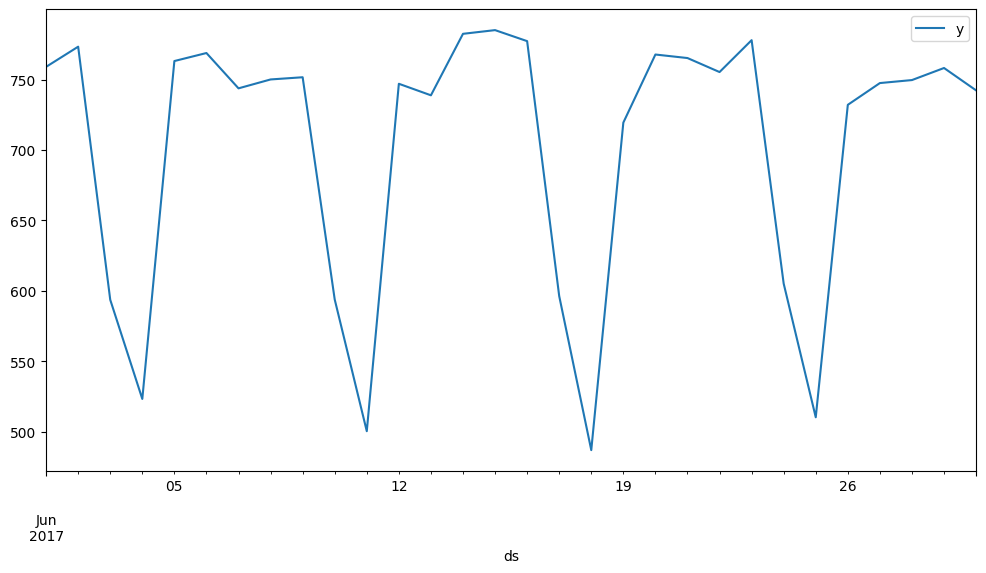

In [3]:
df.plot(x ='ds', y ='y', figsize =(12,6))

train_section=df.iloc[:21]
test_section=df.iloc[21:]

model = Prophet()
model.fit(train_section)
future_value = model.make_future_dataframe(periods=40)
forecast = model.predict(future_value)

In [4]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2017-07-27,751.239040,732.917866,769.546314
57,2017-07-28,753.931679,735.469221,772.427200
58,2017-07-29,581.226330,562.784322,599.770602
59,2017-07-30,490.186961,471.797337,506.855196
60,2017-07-31,729.732940,711.302163,746.841525


In [5]:
plot_plotly(model, forecast)

In [6]:
plot_components_plotly(model, forecast)

In [7]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

predictions = forecast.iloc[:9]['yhat']
test_data = test_section['y']

rmse_value = rmse(predictions, test_data)
mae_value = mean_absolute_error(predictions, test_data)

print("RMSE =", rmse_value)
print("MAE =", mae_value)
print("Mean =", test_data.mean())

RMSE = 13.191591164528852
MAE = 11.880246613499898
Mean = 708.7222222222222
